In [1]:
from pyspark.sql.functions import randn, rand, sum, col, round
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

### Import Data

In [2]:
df18v1 = spark.read.csv('data/pluto_18v1.csv', header=True)
df18v2 = spark.read.csv('data/pluto.csv', header=True)
df17v11 = spark.read.csv('data/pluto_17v11.csv', header=True)

### convert column names all to lower case

In [3]:
df18v1 = df18v1.select([col(A).alias(A.lower()) for A in df18v1.schema.names])
df18v2 = df18v2.select([col(A).alias(A.lower()) for A in df18v2.schema.names])
df17v11 = df17v11.select([col(A).alias(A.lower()) for A in df17v11.schema.names])

In [4]:
cols = df18v1.columns

In [5]:
df18v1 = df18v1.select(cols)
df18v2 = df18v2.select(cols)
df17v11 = df17v11.select(cols)

In [6]:
df =df18v1.union(df18v2).union(df17v11)

In [7]:
start_time = time.time()
summary = df.groupBy("version").agg(sum("unitsres"),
                                    sum("lotarea"),
                                    sum("bldgarea"),
                                    sum("comarea"),
                                    sum("resarea"),
                                    sum("officearea"),
                                    sum("retailarea"),
                                    sum("garagearea"),
                                    sum("strgearea"),
                                    sum("factryarea"),
                                    sum("otherarea"),
                                    sum("assessland"),
                                    sum("assesstot"),
                                    sum("exemptland"),
                                    sum("exempttot"),
                                    sum("firm07_flag"),
                                    sum("pfirm15_flag"),
                                   sum(col("lotarea")*col("builtfar")),
                                   sum(col("lotarea")*col("residfar")),
                                   sum(col("lotarea")*col("commfar")),
                                   sum(col("lotarea")*col("facilfar"))).toPandas()
elapsed_time = time.time() - start_time

In [8]:
elapsed_time

20.96764898300171

In [26]:
agg_cols = ['version','UnitsRes','LotArea','BldgArea','ComArea',
 'ResArea','OfficeArea','RetailArea','GarageArea',
 'StrgeArea','FactryArea','OtherArea','AssessLand',
 'AssessTot','ExemptLand','ExemptTot','FIRM07_FLAG',
 'PFIRM15_FLAG','LotAreaXBuiltFAR', 'LotAreaXResidFAR',
'LotAreaXCommFAR', 'LotAreaXFacilFAR']

In [27]:
summary.columns = agg_cols

In [9]:
summary.to_csv('aggregate_value.csv')

In [29]:
summary.index = summary.version
summary = summary.reindex(['18v2', '18V1', '17v1.1'])

In [30]:
summary

,version,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,...,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG,LotAreaXBuiltFAR,LotAreaXResidFAR,LotAreaXCommFAR,LotAreaXFacilFAR
version,,,,,,,,,,,,,,,,,,,,,
18v2,18v2,3657886.0,6.490680e+09,5.585354e+09,1.754055e+09,3.422467e+09,624337363.0,272690080.0,117661070.0,94168905.0,...,1.049455e+11,4.181658e+11,4.964622e+10,1.595763e+11,34684.0,65692.0,5.497067e+09,6.419536e+09,2.563992e+09,1.183564e+10
18V1,18V1,3555871.0,6.815806e+09,5.484765e+09,1.816284e+09,3.470204e+09,652968426.0,276388698.0,122406091.0,102263027.0,...,9.779918e+10,3.955918e+11,4.414227e+10,1.422077e+11,34562.0,65618.0,5.448441e+09,6.733104e+09,2.865011e+09,1.219444e+10
17v1.1,17v1.1,3535776.0,6.813541e+09,5.464293e+09,1.815464e+09,3.449799e+09,649838284.0,276187004.0,122093670.0,104659836.0,...,9.822458e+10,3.846283e+11,4.492449e+10,1.478786e+11,34569.0,65628.0,5.446584e+09,6.685347e+09,2.863380e+09,1.216741e+10


In [31]:
summary_pct = summary.iloc[:, 1:].pct_change()

In [32]:
summary_pct

,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,...,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG,LotAreaXBuiltFAR,LotAreaXResidFAR,LotAreaXCommFAR,LotAreaXFacilFAR
version,,,,,,,,,,,,,,,,,,,,,
18v2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18V1,-0.027889,0.050091,-0.018010,0.035477,0.013948,0.045858,0.013563,0.040328,0.085953,0.021214,...,-0.068096,-0.053983,-0.110863,-0.108842,-0.003517,-0.001126,-0.008846,0.048846,0.117402,0.030315
17v1.1,-0.005651,-0.000332,-0.003733,-0.000452,-0.005880,-0.004794,-0.000730,-0.002552,0.023438,-0.006280,...,0.004350,-0.027714,0.017720,0.039878,0.000203,0.000152,-0.000341,-0.007093,-0.000569,-0.002216


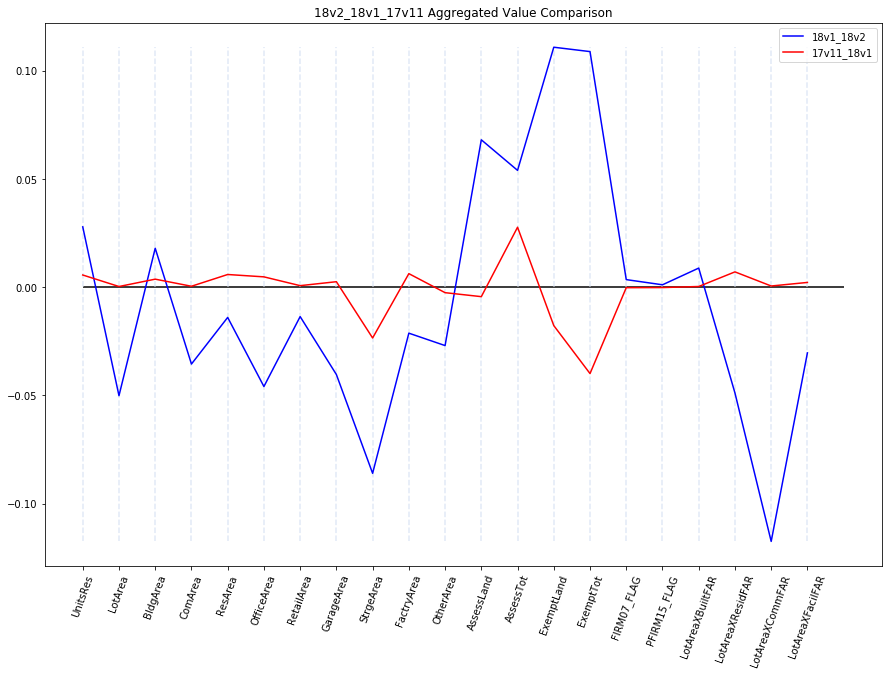

In [33]:
plt.figure(figsize=(15, 10))
plt.plot(range(21), -summary_pct.iloc[1, :], color = 'blue', label='18v1_18v2')
plt.plot(range(21), -summary_pct.iloc[2, :], color = 'red', label='17v11_18v1')
plt.hlines(0, 0, 21, color = 'black')
for i in range(21):
    plt.vlines(i, min(-summary_pct.iloc[1, :]), max(-summary_pct.iloc[1, :]), color = '#e1e9f7', linestyles='dashed')
plt.xticks(range(21), summary_pct.columns, rotation=70)
plt.title('18v2_18v1_17v11 Aggregated Value Comparison')
plt.legend()
plt.savefig('18v2_18v1_17v11_Aggregated_Value_Comparison.png', bbox_inches='tight')
plt.show()